**Nome:** Iran Freitas Ribeiro

**Matrícula:** 20212021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [164]:
import numpy as np
from scipy.stats import norm, ttest_rel, chi2, t, ttest_ind
import matplotlib.pyplot as plt

In [141]:
def CI(mu1, mu2, var1, var2, n1, n2, alpha=0.05):
    """
    Calcula o intervalo de confiança de uma distribuição normal
    """
    zalpha_2  = norm.ppf(alpha/2)
    sqrt_ = (var1/n1) + (var2/n2)
    ci_d = (mu1-mu2) - zalpha_2*np.sqrt(sqrt_) # limite superior    
    ci_l = (mu1-mu2) + zalpha_2*np.sqrt(sqrt_) # limite inferior
    return ci_l, ci_d

def get_XY(f, v=1):
    np.random.seed(42)
    N = np.random.randint(1,11)
    sx=0.1*N
    sy=v*sx
    mx = N+f*0.1*N
    my = N
    Xrand = np.random.normal(loc=mx, scale=np.sqrt(sx), size=1000)
    Yrand = np.random.normal(loc=my, scale=np.sqrt(sy), size=1000)
    return Xrand, mx, sx, Yrand, my, sy

def test_estatistico(m1, m2, delta0, s1, s2, n1, n2):
    num = m1 - m2 - delta0
    denom = np.sqrt((s1/n1) + (s2/n2))
    return num/denom

## 1

In [4]:
palpha = norm.ppf(1-0.05)
nrejeitar = {}
rejeitar = {}
for f in np.arange(0,2,0.01):
    Xf, mx, sx, Yf, my, sy = get_XY(f)
    amostraX = np.random.choice(Xf, size=20)
    amostraY = np.random.choice(Yf, size=20)
    m1, m2 = [np.mean(amostraX), np.mean(amostraY)]
    s1, s2 = [np.std(amostraX), np.std(amostraY)]
    z0 = test_estatistico(m1, m2, 0, s1=s1**2, s2=s2**2, n1=20, n2=20)
    if (z0 > palpha):
        print ("Rejeitar hipótese nula quando {}".format(f))
        rejeitar['x'], rejeitar['y'] = [amostraX,amostraY]
        rejeitar['mx'], rejeitar['my'] = [mx, my]
        rejeitar['sx'], rejeitar['sy'] = [sx, sy]
        rejeitar['z0'] = z0
        break
    else:
        if len(nrejeitar.keys())==0:
            print ("Não rejeitar hipótese nula quando {}".format(f))
            nrejeitar['x'], nrejeitar['y'] = [amostraX,amostraY]
            nrejeitar['mx'], nrejeitar['my'] = [mx, my]
            nrejeitar['sx'], nrejeitar['sy'] = [sx, sy]
            nrejeitar['z0'] = z0

Não rejeitar hipótese nula quando 0.0
Rejeitar hipótese nula quando 1.26


In [116]:
def erro_I(d, sn='x', n=20):
    s_ = np.sqrt(d['s{}'.format(sn)])
    ci_ = CI(np.mean(d[sn]), sigma=s_, n=n, alpha=0.05)
    z1x = (ci_[0]-np.mean(d[sn]))/(s_/n)
    z2x = (ci_[1]-np.mean(d[sn]))/(s_/n)
    e = norm.cdf(z1x)*2
    return e, ci_, s_

def erro_II(alpha, m1, m2, s1, s2, n1, n2, delta0):
    delta = m1-m2   
    z_a2 = norm.ppf(1-(alpha/2))
    denom = np.sqrt((s1/n1) + (s2/n2))
    c1 = (z_a2 - (delta-delta0)/denom)
    c2 = (-z_a2 - (delta-delta0)/denom)
    e = norm.cdf(c1) - norm.cdf(c2)
    return e

def pvalue(z0):
    return 1 - norm.cdf(z0)

In [15]:
# rejeita h0
# s_x (desvio)
eI_x, ci_rx, s_x = erro_I(rejeitar)
eI_y, ci_ry, s_y = erro_I(rejeitar, sn='y')
# não rejeita h0
eI_nx, ci_nrx, s_nx = erro_I(nrejeitar)
eI_ny, ci_nry, s_ny = erro_I(nrejeitar, sn='y')

In [20]:
nrejeitar['x'].mean(),nrejeitar['y'].mean()

(6.706421363818421, 7.167549563167898)

In [23]:
m1, m2 = [nrejeitar['x'].mean(), nrejeitar['y'].mean()]
s1, s2 = [np.sqrt(nrejeitar['sx']), np.sqrt(nrejeitar['sy'])]
eII_nr = erro_II(0.05,m1,m2,s1,s2, 20, 20, 0)

In [26]:
pvalue(2.52)

0.005867741715332553

In [165]:
print ("{:.4f}".format(eI_x))

0.0000


In [30]:
def get_pdfs(d, sx, sy, n, b=[0,0]):
    ab_x = [d['mx']-np.sqrt(d['sx']), d['mx']+np.sqrt(d['sx'])]
    ab_y = [d['my']-np.sqrt(d['sy']), d['my']+np.sqrt(d['sy'])]
    Xis = np.linspace(ab_x[0]-b[0], ab_x[1], 500)
    Yis = np.linspace(ab_y[0]-b[1], ab_y[1], 500)
    pdfx = [norm.pdf(xi, loc=d['mx'], scale=sx) for xi in Xis]
    pdfy = [norm.pdf(yi, loc=d['my'], scale=sy) for yi in Yis]
    return Xis, Yis, pdfx, pdfy

In [31]:
Xis_r, Yis_r, pdfx_r, pdfy_r = get_pdfs(rejeitar, s_x, s_y, 20, b=[0,0])
Xis_nr, Yis_nr, pdfx_nr, pdfy_nr = get_pdfs(nrejeitar, s_nx, s_ny, 20, b=[0,0])

In [27]:
nrejeitar['mx']

7.0

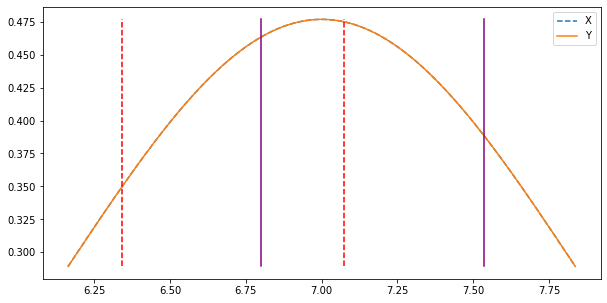

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Xis_nr, pdfx_nr, label='X', ls='--')
ax.plot(Yis_nr, pdfy_nr, label='Y')

lim_inf, lim_sup = [np.min(pdfx_nr), np.max(pdfx_nr)]
one_x12, one_y12 = [ci_nrx[0],ci_nrx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_nrx[1],ci_nrx[1]],[lim_inf,lim_sup]

o_x12, o_y12 = [ci_nry[0],ci_nry[0]],[lim_inf,lim_sup]
t_x12, t_y12 = [ci_nry[1],ci_nry[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red', ls='--')
ax.plot(o_x12, o_y12, t_x12, t_y12, color='purple')

plt.legend();

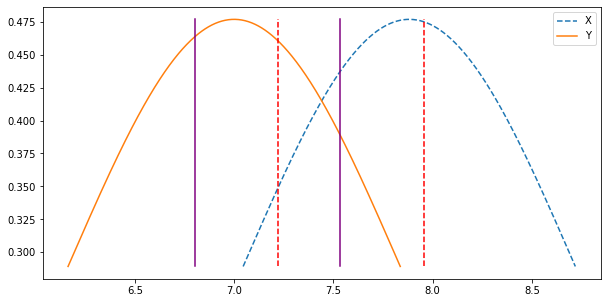

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Xis_r, pdfx_r, label='X', ls='--')
ax.plot(Yis_r, pdfy_r, label='Y')

lim_inf, lim_sup = [np.min(pdfx_r), np.max(pdfx_r)]
one_x12, one_y12 = [ci_rx[0],ci_rx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_rx[1],ci_rx[1]],[lim_inf,lim_sup]

o_x12, o_y12 = [ci_ry[0],ci_ry[0]],[lim_inf,lim_sup]
t_x12, t_y12 = [ci_ry[1],ci_ry[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red', ls='--')
ax.plot(o_x12, o_y12, t_x12, t_y12, color='purple')
plt.legend();

## 2

In [33]:
import pandas as pd

In [34]:
subject = np.arange(1,16,1)
before = [265, 240, 258, 295, 251, 245, 287, 314, 260, 279, 283, 240, 238, 225, 247]
after  = [229, 231, 227, 240, 238, 241, 234, 256, 247, 239, 246, 218, 219, 226, 233]
df = pd.DataFrame({'subject': subject, 'before': before, 'after':after})
df

,subject,before,after
0,1,265,229
1,2,240,231
2,3,258,227
3,4,295,240
4,5,251,238
5,6,245,241
6,7,287,234
7,8,314,256
8,9,260,247
9,10,279,239


Para solução da questão temos duas hipóteses:

$H_0$: low-fat diet and aerobic exercise não reduzem o nível de colesterol no sangue (com um nível de significância $\alpha=0.05$)

$H_1$: low-fat diet and aerobic exercise reduzem o nível de colesterol no sangue

In [37]:
res = ttest_rel(df['before'], df['after'] )

In [49]:
res.pvalue.round(4)

0.0001

Como o $p$-value ($0.0001$) é menor que $\alpha$, não conseguimos rejeitar a hipótese nula de que as médias são iguais, logo, podemos afirmar que dietas com baixa calorias e exercícios reduzem o nível de colesterol no sangue.

## 3

In [26]:
def test_estatistico_var(n, s2, s2_0):
    x_0 = ((n-1)*s2)/s2_0
    return x_0
def pvalue_var(t_v, n, mu, s):
    return 1 - chi2.cdf(t_v, df=(n-1), loc=mu, scale=s)


1. O parâmetro de interesse é a variância $\sigma^2$
2. $H_0$: $\sigma_{x}^2 = \sigma_{y}^2$
3. $H_1$: $\sigma_{x}^2 \neq \sigma_{y}^2$
4. $\alpha=0.05$
5. O teste estatístico é definido pela função `x_0 = teste_estatistico_var()`
6. Rejeitamos $H_0$ se `x_0` $> \chi_{0.05,19}^2 = 30.14$ 
7. Calculos:

In [3]:
# rejeita a hipotese nula
def dict_variaveis(v):
    var_rej = {}
    Xv, mx_v, sx_v, Yv, my_v, sy_v = get_XY(f=1.26, v=v)
    amostraXv = np.random.choice(Xv, size=20)
    amostraYv = np.random.choice(Yv, size=20)
    x_0 = test_estatistico_var(20,sx_v,sy_v)
    var_rej['Xv'], var_rej['Yv'] = [Xv, Yv]
    var_rej['x'], var_rej['y'] = [amostraXv, amostraYv]
    var_rej['sx'],var_rej['sy'] = [sx_v, sy_v]
    var_rej['mx'],var_rej['my'] = [mx_v, my_v]
    var_rej['x_0'] = x_0
    return var_rej

In [4]:
def CI_Var(n, s2, alpha=0.05):
    """
    Calcula o intervalo de confiança da variância
    """
    # percentage point da distribuição qui2 com n-1 graus de liberdade
    x2_right = chi2.ppf(alpha/2, df=(n-1))
    x2_left = chi2.ppf(1-(alpha/2), df=(n-1))
    # limite inferior
    ci_l = ((n-1)*s2)/x2_left
    # limite superior
    ci_r = ((n-1)*s2)/x2_right
    return ci_l, ci_r

def erro_I_var(d, sn='x', n=20):
    s2 = d['s{}'.format(sn)]
    ci_ = CI_Var(n,s2)
    z1x = chi2.cdf(0)
    e = norm.cdf(z1x)
    return e, ci_

In [9]:
chi2.cdf(x=1, df=19, loc=7, )

0.0

In [21]:
rejeitar = dict_variaveis(0.5)
rejeitar['x_0']

38.0

In [13]:
nrejeitar = dict_variaveis(0.9)
nrejeitar['x_0']

21.111111111111107

In [29]:
max = nrejeitar['Xv'].max()
muX = nrejeitar['x'].mean()
muY = nrejeitar['my']
sx = np.sqrt(nrejeitar['sx'])
sy = np.sqrt(nrejeitar['sy'])
Xis_chi2 = np.linspace(0, 11, 100)
pdf_nrjc2X = [chi2.pdf(xi, df=19, loc=muX, scale=sx) for xi in Xis_chi2]

In [45]:
# intervalo de confiança quando n é possível rejeitar
ci_var_rj = CI_Var(20, np.sqrt(sx))

In [49]:
chi2.cdf(ci_var_rj[0], df=19).round(2)

0.0

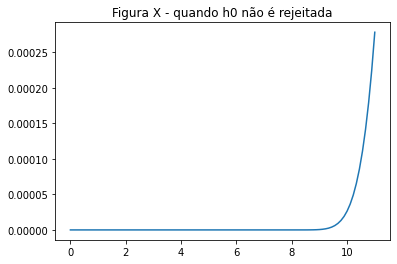

In [30]:
fig, ax = plt.subplots()
ax.plot(Xis_chi2, pdf_nrjc2X)
plt.title("Figura X - quando h0 não é rejeitada");

In [22]:
muX = rejeitar['x'].mean()
muY = rejeitar['my']
sx = np.sqrt(rejeitar['sx'])
sy = np.sqrt(rejeitar['sy'])
max_x = int(rejeitar['Xv'].max())
Xis_chi2 = np.linspace(0, max_x, 100)
pdf_nrjc2X = [chi2.pdf(xi, df=19, loc=muX, scale=sx) for xi in Xis_chi2]
pdf_nrjc2Y = [chi2.pdf(xi, df=19, loc=muY, scale=sy) for xi in Xis_chi2]

In [27]:
pvalue_var(rejeitar['x_0'],n=20, mu=muX, s=sx)

0.009561155324051773

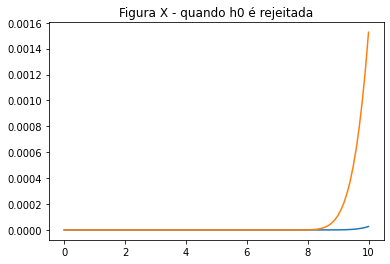

In [28]:
fig, ax = plt.subplots()
ax.plot(Xis_chi2, pdf_nrjc2X)
ax.plot(Xis_chi2, pdf_nrjc2Y)
plt.title("Figura X - quando h0 é rejeitada");

## 4

[Ver](https://stats.stackexchange.com/questions/475289/confidence-interval-for-2-sample-t-test-with-scipy)

In [155]:
np.random.seed(42) # para fins de reprodutibilidade
N = np.random.randint(1, 11)
sigma = np.sqrt(0.05*N)
X_4 = np.random.normal(loc=N, scale=sigma, size=1000)
# x(k+500)=x(k+500)+0.3*N*k/500
for k in range(0, 500, 1):
    X_4[k+500] = X_4[k+500] + 0.3*N*(k/500)

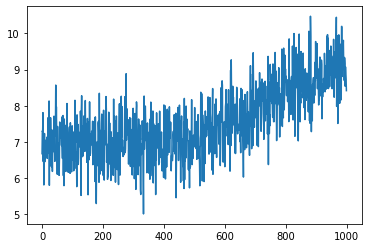

In [156]:
fig, ax = plt.subplots()
ax.plot(np.arange(1000), X_4);

In [161]:
def welch_ttest(x1, x2):
    
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    tstat = delta /  pooled_se
    df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
    
    # two side t-test
    p = 2 * t.cdf(-abs(tstat), df)
    
    # upper and lower bounds
    lb = delta - t.ppf(0.975,df)*pooled_se 
    ub = delta + t.ppf(0.975,df)*pooled_se
    ci = [lb, ub]
    return ci, p

In [144]:
def e_I(m1, m2, v1, v2, n1=20, n2=20, alpha=0.05):
    ci_ = CI(m1, m2, var1=v1, var2=v2, n1=n1, n2=n2, alpha=alpha)
    denom = (v1/n1) + (v2/n2)
    z1x = (ci_[0]-(m1-m2))/denom
    e = norm.cdf(z1x)*2
    return e, ci_

$H_0$: não foi detectado erro, com nível de confiança de $0.05$

$H_1$: foi detectado erro

In [162]:
erros_tipoI = []
erros_tipoII = []
A = np.linspace(0.01, 0.01, 100)
Ns= np.linspace(20,500,100, dtype='int')
s1=s2=sigma**2
for n, a in zip(Ns,A):
    palpha = 1 - a
    inicio_dados = X_4[:n]
    restante_dados = X_4[n:]
    m1, m2 = [inicio_dados.mean(), restante_dados.mean()]
    z0 = test_estatistico(m1, m2, 0, s1=s1, s2=s2, n1=len(inicio_dados), n2=len(restante_dados))
    ei = e_I(m1, m2, v1=s1, v2=s2, n1=n, n2=1000-n, alpha=a)
    # eii = erro_II(a, m1, m2, s1, s2, len(inicio_dados), len(restante_dados), 0)
    erros_tipoI.append(ei[0])

In [169]:
20
palpha = 1 - a
inicio_dados = X_4[:n]
restante_dados = X_4[n:]
m1, m2 = [inicio_dados.mean(), restante_dados.mean()]
s1, s2 = [inicio_dados.var(ddof=1), restante_dados.var(ddof=1)]
z0 = test_estatistico(m1, m2, 0, s1=s1, s2=s2, n1=len(inicio_dados), n2=len(restante_dados))
#ei = e_I(m1, m2, v1=s1, v2=s2, n1=n, n2=1000-n, alpha=a)
z0

-23.618243174838334

In [168]:
r = ttest_ind(inicio_dados, restante_dados, equal_var=True)
print(r.statistic, r.pvalue)

-23.618243174838334 2.526112375188479e-98


In [139]:
1.5**2

2.25

In [142]:
CI(87.6, 74.5, 1, 2.25, 10, 12, alpha=0.1)

(12.218045498309328, 13.98195450169066)

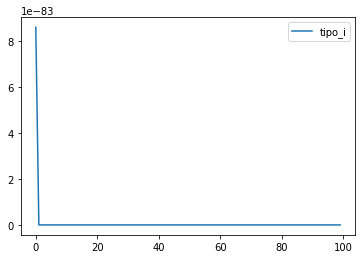

In [158]:
plt.plot(erros_tipoI, label='tipo_i')
# plt.plot(erros_tipoII, label='tipo_ii')
plt.legend()

In [51]:
erros_tipoI[0]

0.0